# **Introduction to Time series data**

In [1]:
!pip install pandas numpy matplotlib statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index: 1 year of daily data
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# Create trend: A gradual increase over time
trend = np.linspace(start=10, stop=50, num=365)

# Create seasonality: A repeating pattern (e.g., yearly cycle)
seasonality = 10 * np.sin(2 * np.pi * date_range.dayofyear / 365)

# Create noise: Random fluctuations
noise = np.random.normal(loc=0, scale=3, size=365)

# Combine all components to create a final time series
time_series = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({"Date": date_range, "Value": time_series})

# Set Date as Index (Time Index)
df.set_index("Date", inplace=True)

# Display first few rows
df.head()


,Value
Date,
2024-01-01,11.662276
2024-01-02,10.039313
2024-01-03,12.679043
2024-01-04,15.586784
2024-01-05,10.596748


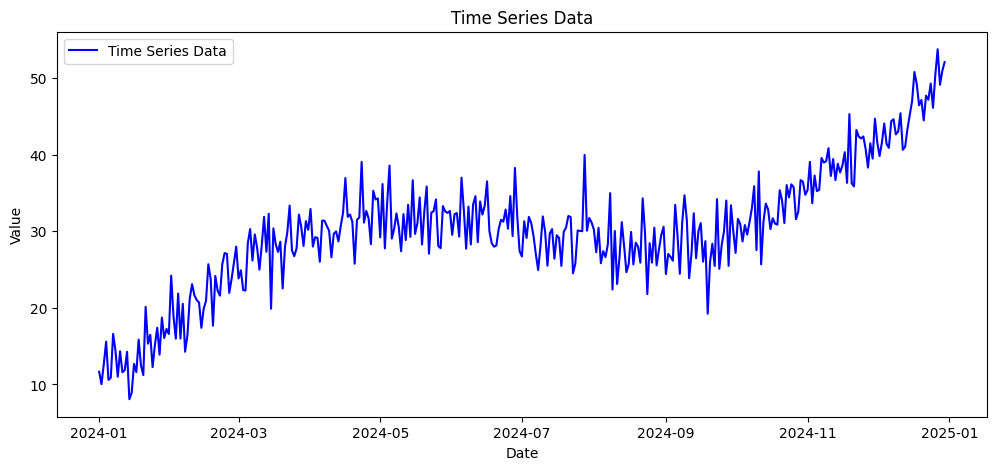

In [5]:

# Create a new figure with a specific size (width=12 inches, height=5 inches)
plt.figure(figsize=(12, 5))

# Plot the time series data
plt.plot(df.index, df["Value"], label="Time Series Data", color="b")
# df.index → Represents the date values (x-axis)
# df["Value"] → Represents the time series values (y-axis)
# label="Time Series Data" → Adds a label for the legend
# color="b" → Sets the line color to blue

# Add labels for the x-axis and y-axis
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Value")  # Label for the y-axis

# Add a title to the plot
plt.title("Time Series Data")

# Display the legend to indicate what the plotted line represents
plt.legend()

# Show the final plot
plt.show()


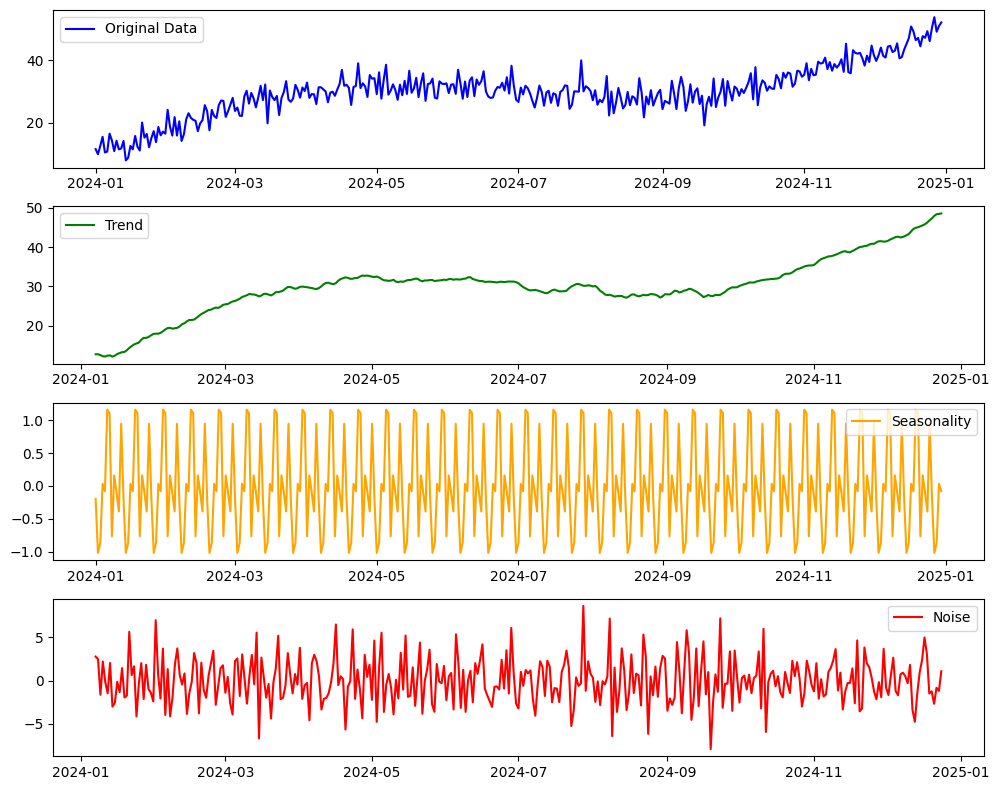

In [7]:


# Perform seasonal decomposition on the time series data
# The period parameter should be at least 2 or more to avoid the error.
# Period is the number of observations per cycle.
# In this case, setting it to 12 (monthly seasonality) for demonstration
decomposition = seasonal_decompose(df["Value"], model="additive", period=12)
# 'model="additive"' → Assumes the time series is an additive combination of trend, seasonality, and residuals

# Create a figure with a specific size
plt.figure(figsize=(10, 8))

# Plot the original time series data
#Divides the figure into 4 rows and 1 column (i.e., 4 stacked plots).
plt.subplot(4, 1, 1)  # Creates the first subplot (4 rows, 1 column, first plot)
plt.plot(df["Value"], label="Original Data", color="blue")
plt.legend(loc="best")  # Add a legend for clarity

# Plot the extracted trend component
plt.subplot(4, 1, 2)  # Second subplot
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend(loc="best")

# Plot the extracted seasonal component
plt.subplot(4, 1, 3)  # Third subplot
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend(loc="best")

# Plot the extracted residual (noise) component
plt.subplot(4, 1, 4)  # Fourth subplot
plt.plot(decomposition.resid, label="Noise", color="red")
plt.legend(loc="best")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the final plot
plt.show()


# **Moving Average & Standard Deviation**

In [8]:


# Generate a range of daily dates for one year (2024)
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# Set a random seed for reproducibility (ensures same random values every run)
np.random.seed(42)

# Generate a trend component: A gradual increase from 10 to 50 over the year
trend = np.linspace(start=10, stop=50, num=365)

# Generate noise component: Random fluctuations around the trend
noise = np.random.normal(loc=0, scale=3, size=365)  # Mean=0, Std Dev=3

# Combine trend and noise to create the final time series data
data = trend + noise

# Create a DataFrame to store the time series data
df = pd.DataFrame({"Date": date_range, "Value": data})

# Set the "Date" column as the index (Time Series Indexing)
df.set_index("Date", inplace=True)

# Display the first few rows of the DataFrame
df.head()


,Value
Date,
2024-01-01,11.490142
2024-01-02,9.695097
2024-01-03,12.162846
2024-01-04,14.898760
2024-01-05,9.737100


In [10]:
# Calculate 7-day Simple Moving Average (SMA)
df["SMA_7"] = df["Value"].rolling(window=7).mean()
# - `rolling(window=7)`: Creates a rolling window of 7 days.
# - `.mean()`: Computes the average of the values within the 7-day window.
# - The first 6 rows will have NaN values since a full 7-day window isn’t available.

# Calculate 7-day Exponential Moving Average (EMA)
df["EMA_7"] = df["Value"].ewm(span=7, adjust=False).mean()
# - `ewm(span=7, adjust=False)`: Creates an exponentially weighted moving average.
# - `span=7`: Defines the window size but gives **more weight to recent values**.
# - EMA reacts faster to changes in data compared to SMA.
#adjust = False...Weights are not normalized, meaning the most recent values have higher influence.

# Calculate 7-day Rolling Standard Deviation (Volatility)
df["Rolling_Std_7"] = df["Value"].rolling(window=7).std()
# - `rolling(window=7)`: Uses a 7-day window.
# - `.std()`: Computes the standard deviation for the rolling window.
# - This measures how much the values fluctuate over the last 7 days.


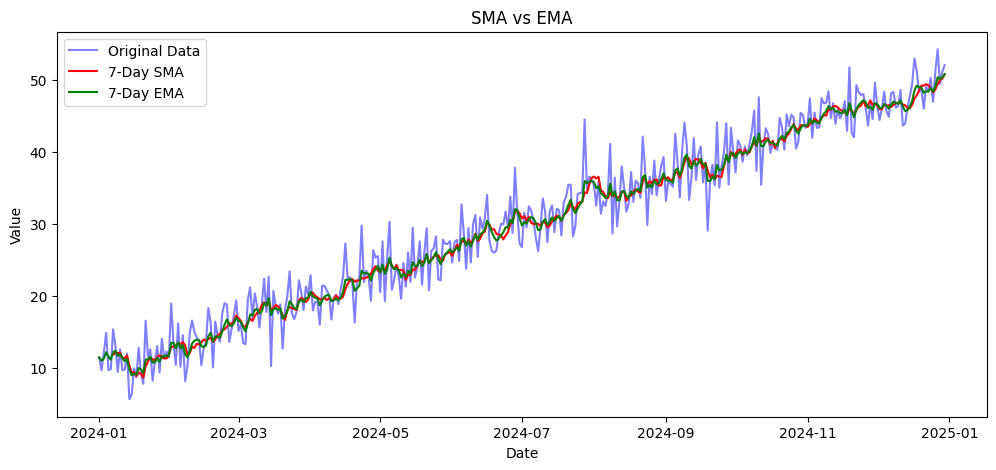

In [11]:


# Set the figure size for better visibility
plt.figure(figsize=(12, 5))  # Width = 12 inches, Height = 5 inches

# Plot the original time series data
plt.plot(df.index, df["Value"], label="Original Data", color="blue", alpha=0.5)
# - `df.index`: X-axis (Dates)
# - `df["Value"]`: Y-axis (Original time series values)
# - `color="blue"`: Blue color for the original data
# - `alpha=0.5`: Makes the line **semi-transparent** for better visibility of overlays

# Plot the 7-day Simple Moving Average (SMA)
plt.plot(df.index, df["SMA_7"], label="7-Day SMA", color="red")
# - `color="red"`: Red line represents SMA
# - SMA smooths fluctuations but **reacts slower** to changes

# Plot the 7-day Exponential Moving Average (EMA)
plt.plot(df.index, df["EMA_7"], label="7-Day EMA", color="green")
# - `color="green"`: Green line represents EMA
# - EMA reacts **faster** to recent changes compared to SMA

# Add labels and title
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Value")  # Label for Y-axis
plt.title("SMA vs EMA")  # Title of the plot

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()


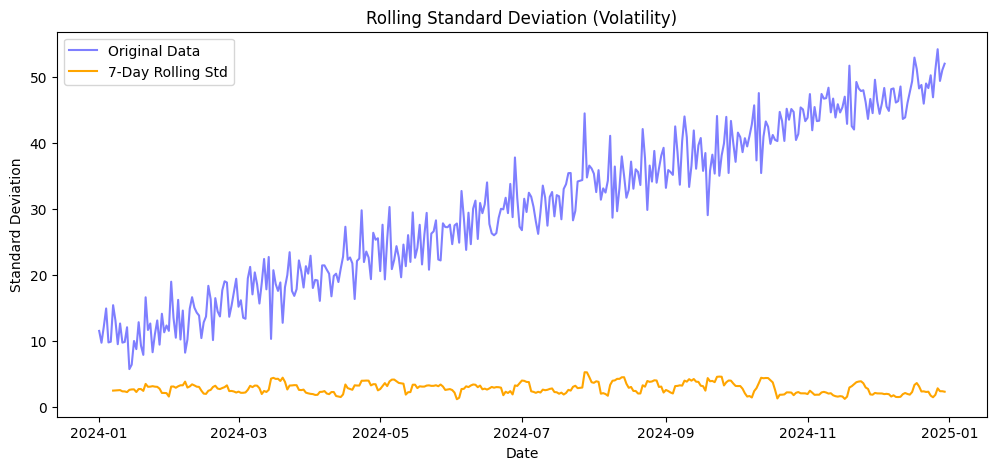

In [12]:
plt.figure(figsize=(12,5))

plt.plot(df.index, df["Value"], label="Original Data", color="blue", alpha=0.5)
plt.plot(df.index, df["Rolling_Std_7"], label="7-Day Rolling Std", color="orange")

plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Rolling Standard Deviation (Volatility)")
plt.legend()
plt.show()


# **Outlier detection using Z-score & IQR**

In [14]:
from scipy.stats import zscore

# Generate a time index (daily data for 180 days)
date_range = pd.date_range(start="2024-01-01", periods=180, freq="D")

# Set a random seed for reproducibility (ensures the same random values are generated each time)
np.random.seed(42)

# Generate a trend (gradual increase from 50 to 100 over 180 days)
trend = np.linspace(50, 100, 180)

# Generate random noise (fluctuations around the trend) with a normal distribution (mean=0, std=5)
noise = np.random.normal(0, 5, 180)

# Inject anomalies (outliers) randomly into the data
# - 95% of the values will be 0 (no anomaly)
# - 2.5% will be +50 (high anomaly)
# - 2.5% will be -50 (low anomaly)
outliers = np.random.choice([0, 50, -50], size=180, p=[0.95, 0.025, 0.025])

# Create the final sensor data by combining trend, noise, and outliers
sensor_data = trend + noise + outliers

# Create a DataFrame with 'Date' as the index and 'Sensor_Value' as the column
df = pd.DataFrame({"Date": date_range, "Sensor_Value": sensor_data})
df.set_index("Date", inplace=True)  # Set 'Date' column as the index
#inplace=True modifies the original DataFrame directly instead of creating a new copy.

# Display the first few rows of the DataFrame
df.head()


,Sensor_Value
Date,
2024-01-01,52.483571
2024-01-02,49.588008
2024-01-03,53.797102
2024-01-04,58.453138
2024-01-05,49.946552


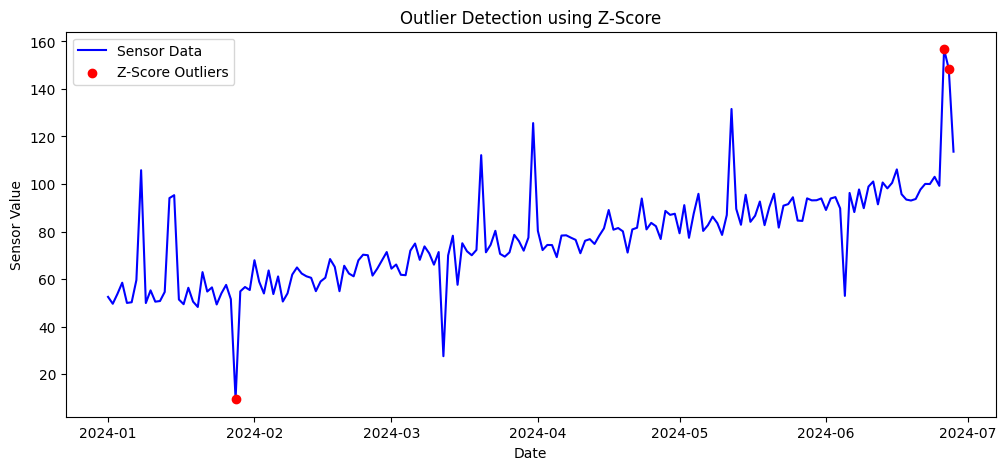

In [19]:
# Compute Z-score for each value in the "Sensor_Value" column
# The Z-score measures how many standard deviations a data point is from the mean.
df["Z_Score"] = zscore(df["Sensor_Value"])
# Identify outliers using a threshold of |Z-score| > 3
# If the absolute Z-score is greater than 3, it's considered an outlier.
df["Z_Outlier"] = df["Z_Score"].abs() > 3

# Plot the results
plt.figure(figsize=(12, 5))  # Set figure size

# Plot the original sensor data as a blue line
plt.plot(df.index, df["Sensor_Value"], label="Sensor Data", color="blue")

# Highlight the detected outliers using red scatter points
# - `df.index[df["Z_Outlier"]]`: Get the indices (dates) where outliers exist
# - `df["Sensor_Value"][df["Z_Outlier"]]`: Get the sensor values of outliers
# - `zorder=3`: Ensures the outlier points appear above the line plot
plt.scatter(df.index[df["Z_Outlier"]], df["Sensor_Value"][df["Z_Outlier"]],
            color="red", label="Z-Score Outliers", zorder=3)

# Label the axes
plt.xlabel("Date")
plt.ylabel("Sensor Value")

# Add a title to the plot
plt.title("Outlier Detection using Z-Score")

# Show legend to identify plotted components
plt.legend()

# Display the plot
plt.show()


89.5701831803378


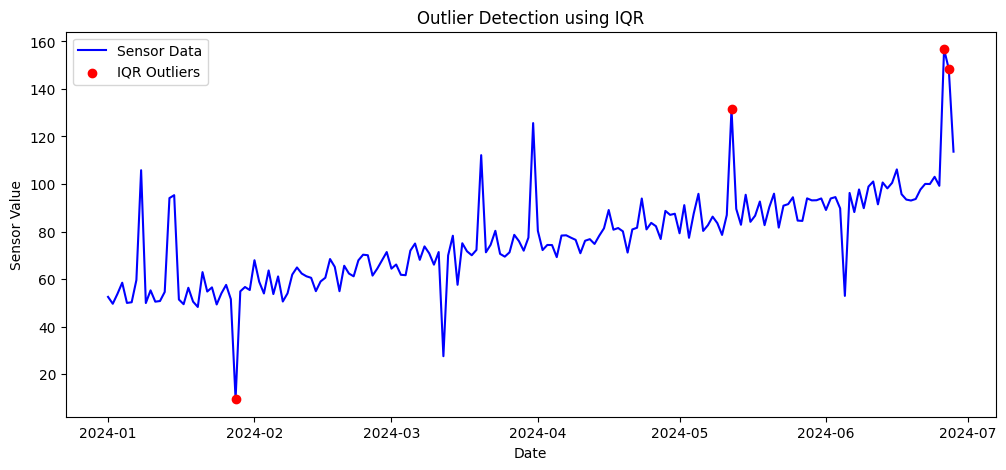

In [21]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["Sensor_Value"].quantile(0.25)  # 25th percentile (first quartile)
Q3 = df["Sensor_Value"].quantile(0.75)  # 75th percentile (third quartile)
#print(Q3)
# Compute IQR (Interquartile Range)
IQR = Q3 - Q1  # The range between Q3 and Q1

# Compute lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

# Identify outliers based on the IQR method
# A value is considered an outlier if it is below the lower bound or above the upper bound
df["IQR_Outlier"] = (df["Sensor_Value"] < lower_bound) | (df["Sensor_Value"] > upper_bound)

# Plot results
plt.figure(figsize=(12,5))  # Set figure size for better visibility

# Plot original sensor data as a blue line
plt.plot(df.index, df["Sensor_Value"], label="Sensor Data", color="blue")

# Highlight the outliers in red using a scatter plot
#extracts the dates where an outlier is present.
#Selects only the sensor values where IQR_Outlier is True.
plt.scatter(df.index[df["IQR_Outlier"]], df["Sensor_Value"][df["IQR_Outlier"]],
            color="red", label="IQR Outliers", zorder=3)

# Add labels and title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Sensor Value")  # Y-axis label
plt.title("Outlier Detection using IQR")  # Plot title

# Display legend to distinguish sensor data and outliers
plt.legend()

# Show the plot
plt.show()


# **Time series specific outlier**

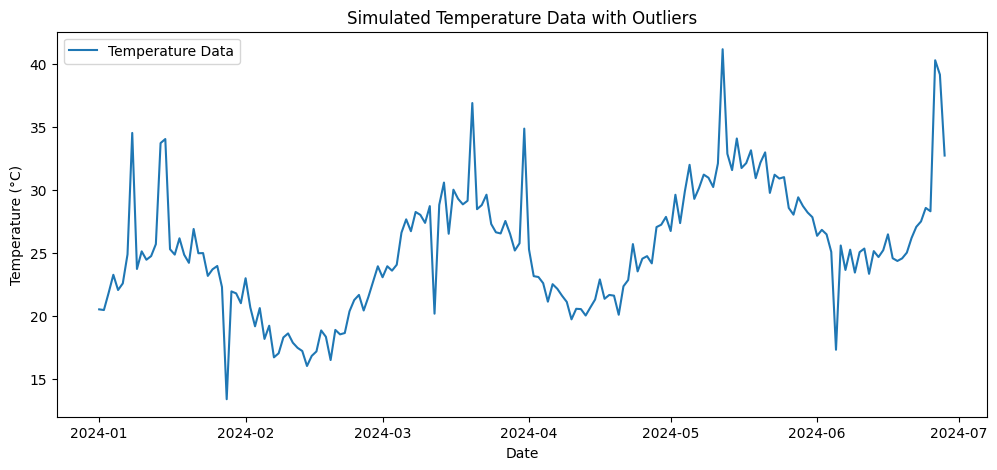

In [22]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate a date range for 180 days starting from January 1, 2024
date_range = pd.date_range(start="2024-01-01", periods=180, freq="D")

# Simulate a temperature trend
trend = np.linspace(20, 30, 180)  # Gradual increase in temperature over time

# Simulate seasonality using a sine wave
seasonality = 5 * np.sin(np.linspace(0, 6*np.pi, 180))
# Creates a repeating wave pattern with amplitude 5

# Generate random noise to make the data more realistic
noise = np.random.normal(0, 1, 180)  # Normally distributed noise with mean 0 and standard deviation 1

# Inject outliers randomly into the data
# - 95% of values are 0 (no anomaly)
# - 2.5% of values are +10 (sudden temperature spikes)
# - 2.5% of values are -10 (sudden temperature drops)
outliers = np.random.choice([0, 10, -10], size=180, p=[0.95, 0.025, 0.025])

# Compute the final temperature values by adding all components together
temperature = trend + seasonality + noise + outliers

# Create a Pandas DataFrame with the temperature data
df = pd.DataFrame({"Date": date_range, "Temperature": temperature})

# Set the "Date" column as the index
df.set_index("Date", inplace=True)

# Plot the generated time series data
plt.figure(figsize=(12, 5))  # Set figure size

# Plot the temperature data
plt.plot(df.index, df["Temperature"], label="Temperature Data")

# Label axes and title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Temperature (°C)")  # Y-axis label
plt.title("Simulated Temperature Data with Outliers")  # Chart title

# Display a legend to label the temperature line
plt.legend()

# Show the plot
plt.show()


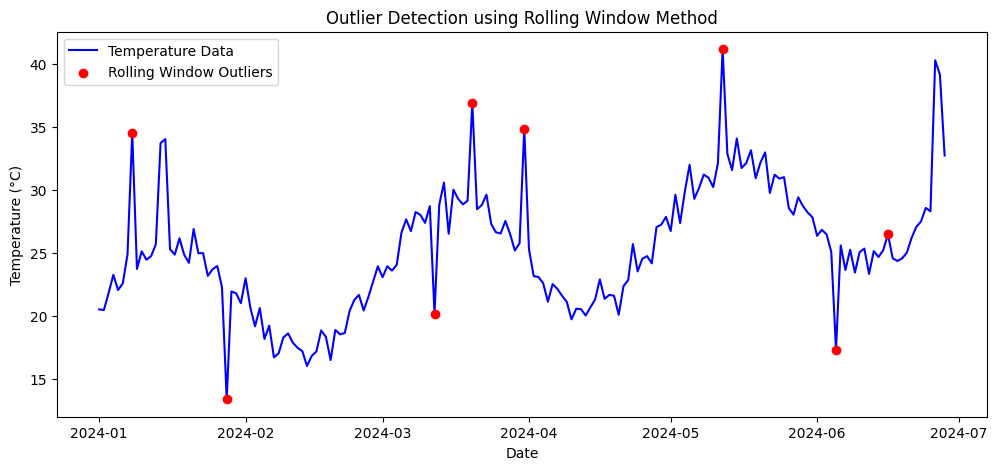

In [25]:
# Compute rolling mean and rolling standard deviation
df["Rolling_Mean"] = df["Temperature"].rolling(window=7, center=True).mean()
# Calculates a 7-day rolling average, smoothing short-term fluctuations
# `center=True` ensures the window is centered around each date

df["Rolling_Std"] = df["Temperature"].rolling(window=7, center=True).std()
# Computes the rolling standard deviation over a 7-day window
# Measures variability in temperature over time
# Compute Rolling Z-Score

df["Rolling_Z_Score"] = (df["Temperature"] - df["Rolling_Mean"]) / df["Rolling_Std"]
# Standardizes the temperature values by subtracting the rolling mean
# and dividing by the rolling standard deviation
# This helps identify extreme deviations in the context of local variations

# Identify outliers where Z-Score is > 2 or < -2
df["Rolling_Outlier"] = df["Rolling_Z_Score"].abs() > 2
# Marks values as outliers if the absolute Z-score is greater than 2
# Outliers are extreme values compared to their local neighborhood

# Plot the rolling window outliers
plt.figure(figsize=(12, 5))  # Set figure size
plt.plot(df.index, df["Temperature"], label="Temperature Data", color="blue")
# Plot the original temperature data

plt.scatter(df.index[df["Rolling_Outlier"]], df["Temperature"][df["Rolling_Outlier"]],
            color="red", label="Rolling Window Outliers", zorder=3)
# Scatter plot to highlight detected outliers in red
# `zorder=3` ensures outliers appear on top of the line plot

plt.xlabel("Date")  # Label for x-axis
plt.ylabel("Temperature (°C)")  # Label for y-axis
plt.title("Outlier Detection using Rolling Window Method")  # Plot title
plt.legend()  # Display legend
plt.show()  # Show the plot


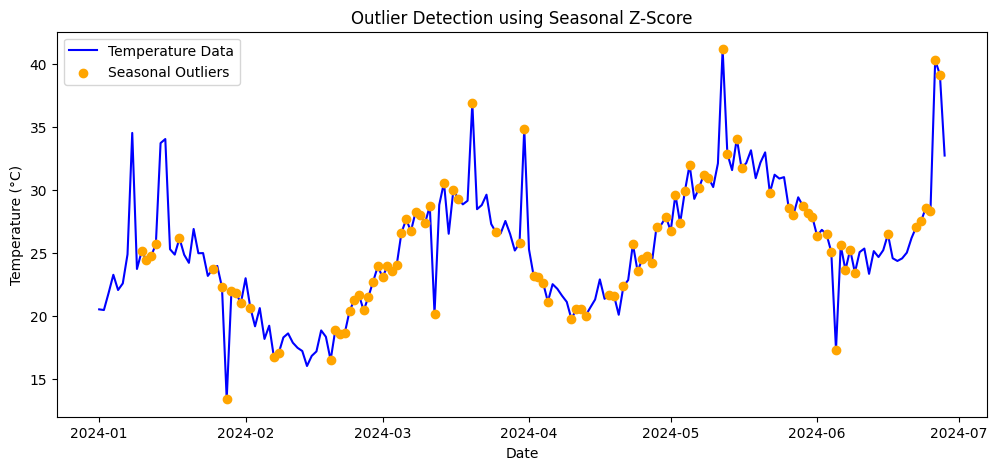

In [26]:
# Compute Z-Score based on similar days from the past (weekly seasonality)

# Calculate the seasonal mean by shifting values by 7 days (same day last week)
# and then computing a rolling mean over a 4-day window.
df["Seasonal_Mean"] = df["Temperature"].shift(7).rolling(window=4, center=True).mean()

# Calculate the seasonal standard deviation in a similar way.
df["Seasonal_Std"] = df["Temperature"].shift(7).rolling(window=4, center=True).std()

# Compute the Seasonal Z-Score:
# - Measures how far the current value deviates from the seasonal mean in terms of standard deviations.
df["Seasonal_Z_Score"] = (df["Temperature"] - df["Seasonal_Mean"]) / df["Seasonal_Std"]

# Identify seasonal outliers:
# - If the absolute Z-score is greater than 2, classify it as an outlier.
df["Seasonal_Outlier"] = df["Seasonal_Z_Score"].abs() > 2

# Plot the seasonal outliers

plt.figure(figsize=(12, 5))  # Set figure size

# Plot the temperature time series data
plt.plot(df.index, df["Temperature"], label="Temperature Data", color="blue")

# Plot detected seasonal outliers as orange scatter points
plt.scatter(df.index[df["Seasonal_Outlier"]], df["Temperature"][df["Seasonal_Outlier"]],
            color="orange", label="Seasonal Outliers", zorder=3)

# Set labels and title for better visualization
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Outlier Detection using Seasonal Z-Score")
plt.legend()
plt.show()


# **Isolation Forest for Anomaly Detection**

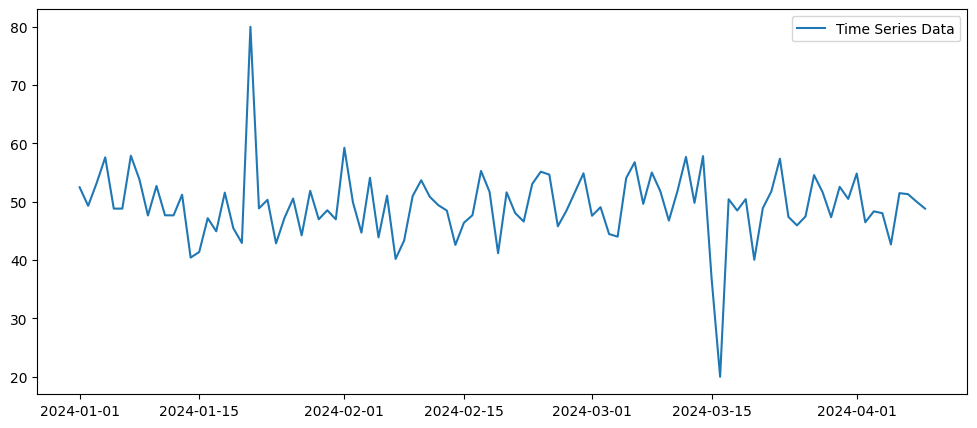

In [27]:
from sklearn.ensemble import IsolationForest

# Creating a time series dataset with an anomaly
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
values = np.random.normal(loc=50, scale=5, size=100)  # Normal distribution

# Injecting some anomalies
values[20] = 80  # Sudden spike
values[75] = 20  # Sudden drop

df = pd.DataFrame({"Date": dates, "Value": values})
df.set_index("Date", inplace=True)

# Plot the raw data
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Value"], label="Time Series Data")
plt.legend()
plt.show()


In [28]:


# Train Isolation Forest model on the dataset
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
# - n_estimators=100: Uses 100 decision trees for anomaly detection
# - contamination=0.05: Assumes that 5% of the data points are anomalies
# - random_state=42: Ensures consistent results when the code is run multiple times

# Fit the model on the "Value" column and get anomaly scores (-1 for outliers, +1 for normal points)
df["Anomaly_Score"] = model.fit_predict(df[["Value"]])

# Create a new column "Anomaly" that stores True for anomalies and False for normal points
df["Anomaly"] = df["Anomaly_Score"] == -1
# - If Anomaly_Score is -1, it's an anomaly (True)
# - If Anomaly_Score is +1, it's a normal data point (False)


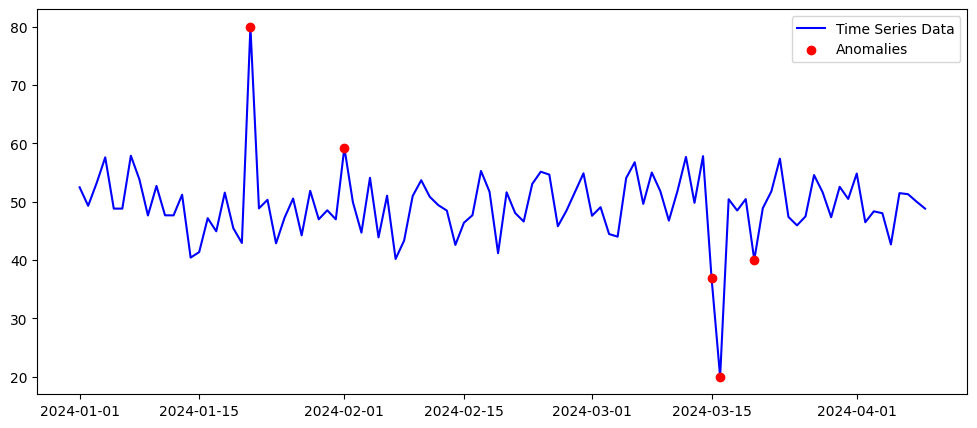

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Value"], label="Time Series Data", color="blue")
plt.scatter(df.index[df["Anomaly"]], df["Value"][df["Anomaly"]],
            color="red", label="Anomalies", zorder=3)
plt.legend()
plt.show()


# **Neighborhood Comparison Methods for Anomaly Detection**

K-NN

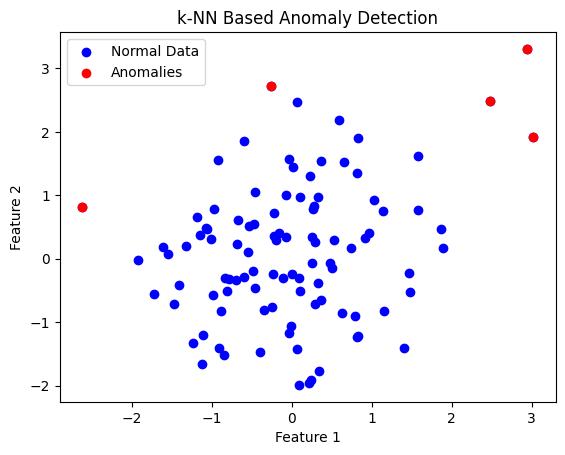

In [1]:
import numpy as np  # For numerical computations
import pandas as pd  # (Not used but often included for data handling)
import matplotlib.pyplot as plt  # For visualization
from sklearn.neighbors import NearestNeighbors  # k-NN for anomaly detection

# -------------------------------
# Step 1: Generate Synthetic Dataset
# -------------------------------

np.random.seed(42)  # Ensures reproducibility

# Generate 100 normal data points from a standard normal distribution (mean=0, std=1)
X = np.random.normal(size=(100, 2))

# Inject 5 anomalies: Replace last 5 points with values drawn from a uniform distribution
# These outliers are randomly spread between -4 and 4, making them distinct from normal data
X[95:] = np.random.uniform(low=-4, high=4, size=(5, 2))

# -------------------------------
# Step 2: Fit k-Nearest Neighbors (k-NN) Model
# -------------------------------

# Initialize k-NN model with 5 neighbors
nbrs = NearestNeighbors(n_neighbors=5)

# Train the model using dataset X
nbrs.fit(X)

# -------------------------------
# Step 3: Compute Distances to Nearest Neighbors
# -------------------------------

# Compute distances from each point to its 5 nearest neighbors
distances, _ = nbrs.kneighbors(X)

# Select the distance to the 5th nearest neighbor as the anomaly score
# Outliers tend to have larger distances because they are far from most normal points
anomaly_scores = distances[:, -1]

# -------------------------------
# Step 4: Identify and Visualize Anomalies
# -------------------------------

# Scatter plot for normal data (blue)
plt.scatter(X[:, 0], X[:, 1], label="Normal Data", color="blue")

# Identify and highlight anomalies:
# - Anomalies are points where the anomaly score is in the top 5% (95th percentile)
plt.scatter(
    X[anomaly_scores > np.percentile(anomaly_scores, 95), 0],  # X-coordinates of anomalies
    X[anomaly_scores > np.percentile(anomaly_scores, 95), 1],  # Y-coordinates of anomalies
    label="Anomalies", color="red"
)

plt.legend()  # Show legend for Normal Data and Anomalies
plt.title("k-NN Based Anomaly Detection")  # Add title to the plot
plt.xlabel("Feature 1")  # Label for X-axis
plt.ylabel("Feature 2")  # Label for Y-axis
plt.show()  # Display the plot


LOF (Local Outlier Factor)

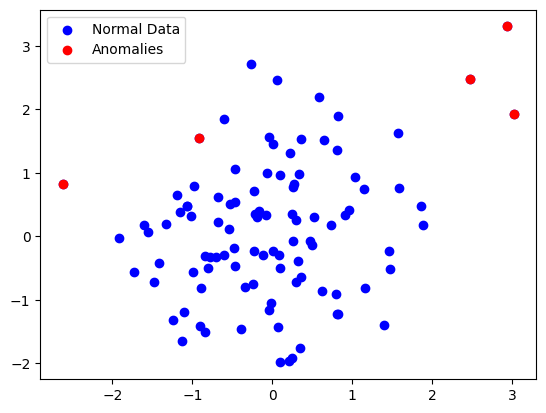

In [5]:
from sklearn.neighbors import LocalOutlierFactor  # Import LOF from scikit-learn

# Apply LOF (Local Outlier Factor) for anomaly detection
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
# - `n_neighbors=5`: Each point is compared with its 5 nearest neighbors
# - `contamination=0.05`: Assumes 5% of the data are anomalies

outliers = lof.fit_predict(X)
# - `fit_predict(X)`: Fits the LOF model and assigns labels
# - Returns `-1` for outliers, `1` for normal data

# Visualize normal data points
plt.scatter(X[:, 0], X[:, 1], label="Normal Data", c="blue")
# - Plots all data points in **blue** (default, assumed normal)

# Visualize detected anomalies
plt.scatter(X[outliers == -1, 0], X[outliers == -1, 1], color="red", label="Anomalies")
# - Selects only points where `outliers == -1` (i.e., anomalies)
# - Plots them in **red**

plt.legend()  # Add a legend to distinguish normal points and anomalies
plt.show()  # Display the plot


DBSCAN (Density-Based Clustering)

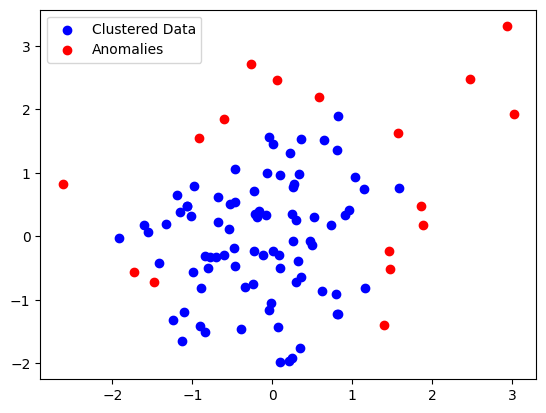

In [13]:
from sklearn.cluster import DBSCAN  # Import DBSCAN algorithm for clustering and anomaly detection

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Initialize DBSCAN with epsilon radius and minimum points per cluster
labels = dbscan.fit_predict(X)  # Fit the model and predict cluster labels for each point in X

# Visualize clusters & anomalies
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], label="Clustered Data", c="blue")
# Plot all points that belong to clusters (label not equal to -1) in blue

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color="red", label="Anomalies")
# Plot all points labeled as -1 (noise/outliers) in red

plt.legend()  # Show legend to label clustered and anomaly points
plt.show()    # Display the plot
